In [213]:
import pandas as pd
import os

In [271]:
files = os.listdir('data/')

files[0:3]

['stationprice2011.xls', 'stationprice2012.xls', 'stationprice2013.xls']

In [261]:
def read_clean_file(file_path):
    rawdata = pd.read_excel('data/'+file_path)
    rownum = rawdata.index[rawdata.iloc[:,0] == 'תאריך'].tolist()
    if not rownum:
        rownum = rawdata.index[rawdata.iloc[:,1] == 'תאריך'].tolist()
        rownum = int(rownum[0])
    else:
        rownum = int(rownum[0])
        
    df =pd.read_excel('data/' +file_path, skiprows = rownum + 1)
    
    clean_df = (df
                .rename(columns = {"תאריך": "datte", 'בנזין 95 אוקטן נטול עופרת' :'gas_price', "תוספת בעד שירות מלא": 'additional_price_full_service'})
                [['datte', 'gas_price', 'additional_price_full_service']]
                .dropna()
                .assign(datte = lambda x: pd.to_datetime(x['datte']))
        )
    
    return(clean_df)

In [273]:
dfs = list(map(read_clean_file, files))
gasprice = pd.concat(dfs)
gasprice

,datte,gas_price,additional_price_full_service
0,2011-01-02,7.14,0.13
1,2011-02-01,7.26,0.13
2,2011-02-14,7.02,0.13
3,2011-03-01,7.30,0.13
4,2011-04-01,7.39,0.13
...,...,...,...
7,2015-08-02,6.38,0.19
8,2015-09-01,6.09,0.19
9,2015-10-01,6.07,0.19
10,2015-11-01,5.96,0.19


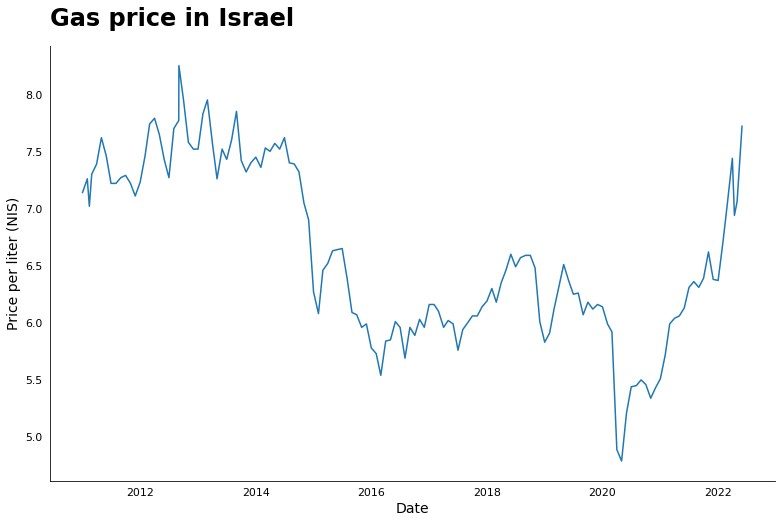

In [337]:
import matplotlib.pyplot as plt
gasprice = gasprice.sort_values(by = 'datte')


fig, ax = plt.subplots(figsize = (13,8))
fig.patch.set_facecolor('white')

plt.plot(gasprice.datte, gasprice.gas_price)
plt.xlabel('Date', size = 14)
plt.ylabel('Price per liter (NIS)', size = 14)
ax.spines[["right", 'top']].set_visible(False)
plt.tick_params(bottom = False, left= False)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(11)
ax.set_title("Gas price in Israel", fontsize = 24, weight= 'bold',loc = 'left',  pad = 20)

plt.savefig('gas_price.png', transparent = False, dpi = 400)
plt.show()